In [1]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
end_date = datetime.today()
start_date = end_date - timedelta(days=365)#252 

time_s = time.time()

spy_data = yf.download("SPY", start = start_date, end=end_date)
sp500_data = yf.download("^GSPC", start=start_date, end=end_date)

time_e = time.time()
time_t = time_e -time_s
print(time_t)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

0.3395273685455322


In [3]:
spy_data.columns = ["_".join(col) for col in spy_data.columns]
sp500_data.columns = ["_".join(col) for col in sp500_data.columns]
print(spy_data.head(1))
print(sp500_data.head(1))

             Close_SPY    High_SPY    Low_SPY    Open_SPY  Volume_SPY
Date                                                                 
2024-03-25  513.237793  514.402956  513.07977  513.267385    48512100
            Close_^GSPC   High_^GSPC    Low_^GSPC  Open_^GSPC  Volume_^GSPC
Date                                                                       
2024-03-25  5218.189941  5229.089844  5216.089844  5219.52002    3331360000


In [5]:

print(spy_data.isnull().sum())
print(sp500_data.isnull().sum())

spy_data["Daily Return SPY"] = spy_data["Close_SPY"].pct_change()
sp500_data["Daily Return SP500"] = sp500_data["Close_^GSPC"].pct_change()

spy_data["Cumulative Return SPY"] = (1 + spy_data["Daily Return SPY"]).cumprod()-1
sp500_data["Cumulative Return SP500"] = (1 + sp500_data["Daily Return SP500"]).cumprod()-1

Close_SPY           0
High_SPY            0
Low_SPY             0
Open_SPY            0
Volume_SPY          0
Daily Return SPY    1
dtype: int64
Close_^GSPC           0
High_^GSPC            0
Low_^GSPC             0
Open_^GSPC            0
Volume_^GSPC          0
Daily Return SP500    1
dtype: int64


In [6]:
spy_data.head()

,Close_SPY,High_SPY,Low_SPY,Open_SPY,Volume_SPY,Daily Return SPY,Cumulative Return SPY
Date,,,,,,,
2024-03-25,513.237793,514.402956,513.079770,513.267385,48512100,NaN,NaN
2024-03-26,512.289795,515.025002,511.884974,514.679364,65463700,-0.001847,-0.001847
2024-03-27,516.595032,516.634568,512.961287,515.153419,82999800,0.008404,0.006541
2024-03-28,516.496338,518.016962,516.210004,516.634593,96294900,-0.000191,0.006349
2024-04-01,515.597656,517.789787,514.422609,517.246712,62477500,-0.001740,0.004598


In [7]:
spy_data.describe()

,Close_SPY,High_SPY,Low_SPY,Open_SPY,Volume_SPY,Daily Return SPY,Cumulative Return SPY
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02,248.000000,248.000000
mean,558.028543,560.724587,555.029198,558.198559,5.301046e+07,0.000417,0.087623
std,32.825469,32.764193,32.703993,32.813569,1.892895e+07,0.008614,0.063845
min,488.937042,494.170422,487.653362,491.573466,2.604870e+07,-0.029803,-0.047348
25%,533.358582,535.988210,531.248620,531.496275,3.871520e+07,-0.003248,0.040954
50%,558.391541,562.138970,554.647029,558.451008,4.730470e+07,0.001035,0.088472
75%,587.290710,592.158691,582.667210,588.140735,6.451390e+07,0.005761,0.144496
max,611.091675,611.390763,607.731787,609.705872,1.462674e+08,0.024865,0.190660


In [8]:
sp500_data.head()

,Close_^GSPC,High_^GSPC,Low_^GSPC,Open_^GSPC,Volume_^GSPC,Daily Return SP500,Cumulative Return SP500
Date,,,,,,,
2024-03-25,5218.189941,5229.089844,5216.089844,5219.520020,3331360000,NaN,NaN
2024-03-26,5203.580078,5235.160156,5203.419922,5228.850098,3871790000,-0.002800,-0.002800
2024-03-27,5248.490234,5249.259766,5213.919922,5226.310059,3850500000,0.008631,0.005807
2024-03-28,5254.350098,5264.850098,5245.819824,5248.029785,3998270000,0.001116,0.006930
2024-04-01,5243.770020,5263.950195,5229.200195,5257.970215,3325930000,-0.002014,0.004902


In [9]:
sp500_data.describe()

,Close_^GSPC,High_^GSPC,Low_^GSPC,Open_^GSPC,Volume_^GSPC,Daily Return SP500,Cumulative Return SP500
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02,248.000000,248.000000
mean,5637.917312,5665.303882,5608.584333,5639.343960,4.088664e+09,0.000371,0.080760
std,314.586015,313.776537,313.458683,314.113677,8.981018e+08,0.008679,0.060190
min,4967.229980,5019.020020,4953.560059,4987.330078,1.757720e+09,-0.029969,-0.048093
25%,5399.220215,5432.390137,5376.979980,5376.979980,3.552750e+09,-0.003527,0.036014
50%,5634.580078,5666.939941,5603.100098,5637.770020,3.869520e+09,0.000993,0.079799
75%,5918.250000,5960.609863,5868.859863,5919.740234,4.458760e+09,0.005525,0.134675
max,6144.149902,6147.430176,6111.149902,6134.500000,9.367460e+09,0.025296,0.177448


SPY daily returns (past year):
count    248.000000
mean       0.000417
std        0.008614
min       -0.029803
25%       -0.003248
50%        0.001035
75%        0.005761
max        0.024865
Name: Daily Return SPY, dtype: float64


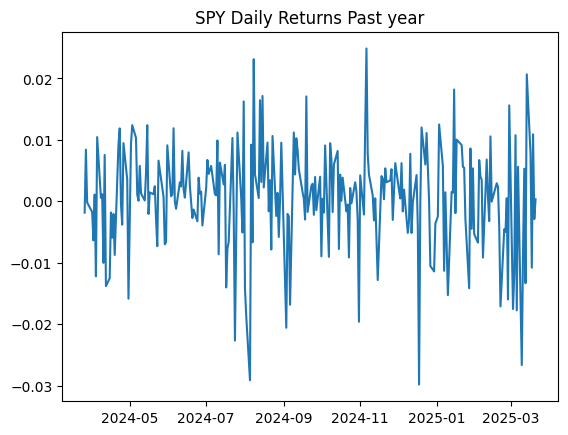


S&P 500 daily returns (past year):
Date
2024-03-26   -0.002800
2024-03-27    0.008631
2024-03-28    0.001116
2024-04-01   -0.002014
2024-04-02   -0.007239
                ...   
2025-03-17    0.006416
2025-03-18   -0.010654
2025-03-19    0.010798
2025-03-20   -0.002185
2025-03-21    0.000825
Name: Daily Return SP500, Length: 248, dtype: float64


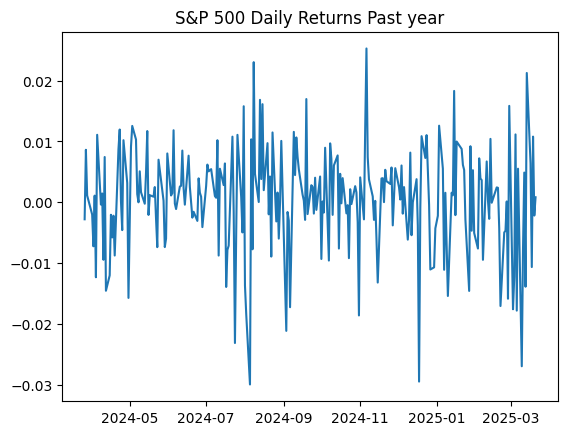

In [10]:

spy_data.dropna(subset=["Daily Return SPY"], inplace=True)
sp500_data.dropna(subset=["Daily Return SP500"], inplace=True)

print("SPY daily returns (past year):")
print(spy_data["Daily Return SPY"].describe())
plt.plot(spy_data["Daily Return SPY"])
plt.title("SPY Daily Returns Past year")
plt.show()

print("\nS&P 500 daily returns (past year):")
print(sp500_data["Daily Return SP500"])
plt.plot(sp500_data["Daily Return SP500"])
plt.title("S&P 500 Daily Returns Past year")
plt.show()

In [11]:
# estimate vol
spy_vol = spy_data["Daily Return SPY"].std() * np.sqrt(252)
sp500_vol = sp500_data["Daily Return SP500"].std() * np.sqrt(252)

print(f"SPY Vol: {spy_vol:.2%}")
print(f"SP500 Vol: {sp500_vol: .2%}")

SPY Vol: 13.67%
SP500 Vol:  13.78%


In [12]:
# rolling vol
spy_data["Rolling_Vol_20d"] = spy_data["Daily Return SPY"].rolling(20).std() * np.sqrt(252)
sp500_data["Rolling_Vol_20d"] = sp500_data["Daily Return SP500"].rolling(20).std() * np.sqrt(252)

# print(spy_data.head(20))
# print(sp500_data.head(20))

## Regression to estimate beta of SPY to SP500

In [13]:
# !pip install statsmodels
import statsmodels.api as sm

In [14]:
data = pd.concat([sp500_data["Daily Return SP500"], spy_data["Daily Return SPY"]], axis=1)
print(data.shape)
print(data.head())

(248, 2)
            Daily Return SP500  Daily Return SPY
Date                                            
2024-03-26           -0.002800         -0.001847
2024-03-27            0.008631          0.008404
2024-03-28            0.001116         -0.000191
2024-04-01           -0.002014         -0.001740
2024-04-02           -0.007239         -0.006358


In [15]:
"""
SPY_return = alpha + beta * SP500_return + error
"""

X = data["Daily Return SP500"]
y = data["Daily Return SPY"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
print()
print("********")
print()
alpha = model.params["const"]
beta = model.params["Daily Return SP500"]
print(f"\nEstimated alpha (intercept): {alpha:.6f}")
print(f"\nEstimated beta: {beta:.3f}")

                            OLS Regression Results                            
Dep. Variable:       Daily Return SPY   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 9.239e+04
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          7.56e-319
Time:                        20:15:50   Log-Likelihood:                 1563.1
No. Observations:                 248   AIC:                            -3122.
Df Residuals:                     246   BIC:                            -3115.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.979e-05   2.83

In [22]:
# calculate volitilities
sigma_spy = data["Daily Return SPY"].std(ddof=1)
sigma_sp500 = data["Daily Return SP500"].std(ddof=1)
sigma_systematic = beta * sigma_sp500
sigma_idiosyncratic = np.sqrt(sigma_spy**2 - sigma_systematic**2)

sigma_spy_annual = sigma_spy * np.sqrt(252)
sigma_systematic_annual = sigma_systematic  * np.sqrt(252)
sigma_idio_annual = sigma_idiosyncratic * np.sqrt(252)

print(f"\n Raw Daily Vols:")
print(f" SP500 daily vol: {sigma_sp500:.5f}")
print(f" SPY daily vol: {sigma_spy:.5f}")
print(f" Systematic daily vol: {sigma_systematic:.5f}")
print(f" Idiosyncratic daily vol: {sigma_idiosyncratic:.5f}")
print(f"\n Annualized Vols (approx):")
print(f" SPY annualized vol: {sigma_spy_annual:.2f}")
print(f" Systematic annualized vol: {sigma_systematic_annual:.2f}")
print(f" Idiosyncratic annualized vol: {sigma_idio_annual:.2f}")




 Raw Daily Vols:
 SP500 daily vol: 0.00868
 SPY daily vol: 0.00861
 Systematic daily vol: 0.00860
 Idiosyncratic daily vol: 0.00044

 Annualized Vols (approx):
 SPY annualized vol: 0.14
 Systematic annualized vol: 0.14
 Idiosyncratic annualized vol: 0.01


### If 𝑋 and 𝑌 are independent, Var(X+Y)=Var(X)+Var(Y).
### σ_ϵ = sqrt((σ_asset)^2 - (βσ_m)^2)

In [25]:
# Dollar variance of SPY (Net Market Value $10M)
vol_market_term = 10000000 * beta * sigma_sp500
idio_vol = 10000000 * sigma_idiosyncratic

print(f"The volitility of the market term: ${vol_market_term:.0f}")
print(f"The idiosyncratic volitility: ${idio_vol:.0f}")

dollar_variance_SPY = np.sqrt((vol_market_term)**2 + (idio_vol)**2)
print(f"Dollar variance of SPY returns: ${dollar_variance_SPY:.0f} ")

The volitility of the market term: $86028
The idiosyncratic volitility: $4439
Dollar variance of SPY returns: $86143 
